# 문제 1

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
grd = {
    '화학' : [82, 91],
    '생물학' : [86, 73],
    '통계학' : [71, 83]
}

grade = DataFrame(grd, index = ['남자', '여자'])
grade

,화학,생물학,통계학
남자,82,86,71
여자,91,73,83


In [4]:
grade.keys
sub = list(grade.keys())
print(sub)
x = np.arange(len(sub))
print(x)

male = list(grade.loc['남자'])
fmale = list(grade.loc['여자'])

print(male)
print(fmale)

['화학', '생물학', '통계학']
[0 1 2]
[82, 86, 71]
[91, 73, 83]


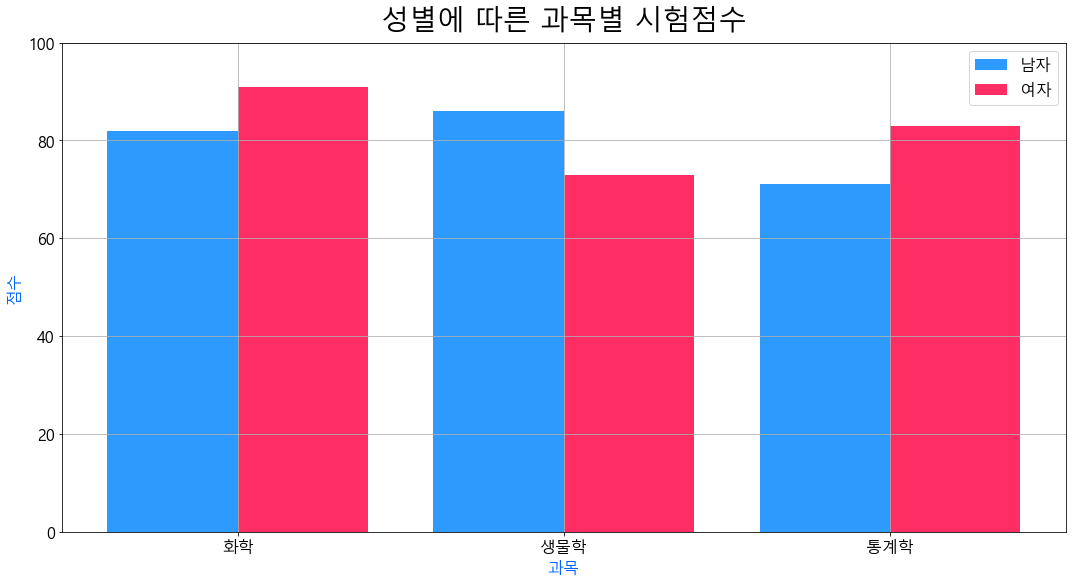

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (18,9))

ax.bar(x-0.2, male, label='남자', width=0.4, color='#2E9AFE') # x = np만 가능
ax.bar(x+0.2, fmale, label='여자', width=0.4, color='#FE2E64')

ax.set_xticks(x)
ax.set_xticklabels(sub)

ax.legend()
ax.grid()
ax.set_xlabel('과목', fontsize=16, color='#0066ff')
ax.set_ylabel('점수', fontsize=16, color='#0066ff')
ax.set_ylim([0,100])
ax.set_title('성별에 따른 과목별 시험점수', fontsize=28, pad=14)

plt.show()
plt.close()

# 문제 2-1

In [6]:
import pymysql

In [7]:
HOSTNAME = "localhost"
PORT = 3306
USERNAME = "root"
PASSWORD = "123qwe!@#"
DATABASE = "myschool"
CHARSET = "utf8"

In [8]:
dbcon = pymysql.connect(host = HOSTNAME, port = PORT, user = USERNAME, password = PASSWORD,
                       db = DATABASE, charset = CHARSET)

In [9]:
cursor = dbcon.cursor()

In [19]:
sql1 = "SELECT count(*) FROM student"
sql2 = "SELECT count(*) FROM student WHERE profno is null"
cursor.execute(sql1)
astu = cursor.fetchone()
print(astu)
cursor.execute(sql2)
nstu = cursor.fetchone()
print(nstu)

source = {
    '학생수': [astu[0]-nstu[0], nstu[0]]
}

df = DataFrame(source, index=['배정됨', '미배정'])
df

(16,)
(6,)


,학생수
배정됨,10
미배정,6


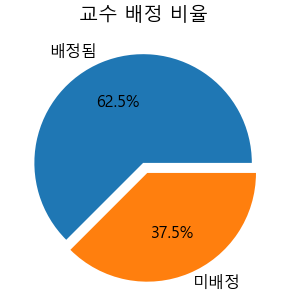

In [21]:
fix, ax = plt.subplots(1, 1)
df['학생수'].plot.pie(
    explode = [0.0, 0.1],
    autopct = '%0.1f%%',
    ax=ax)

ax.set_title('교수 배정 비율')
ax.set_ylabel(None)
plt.show()
plt.close()

# 문제 2-2

In [34]:
sql = "SELECT name, sal*12+100 '연봉' FROM professor order by sal*12+100"
cursor.execute(sql)
sal12 = cursor.fetchall()
df = DataFrame(sal12, columns = ['이름', '연봉'])
df2 = df.set_index('이름')
df2

,연봉
이름,
전은지,2620
염일웅,2980
이재우,3940
성연희,4420
남은혁,4900
이만식,5140
권혁일,5500
김도훈,6100


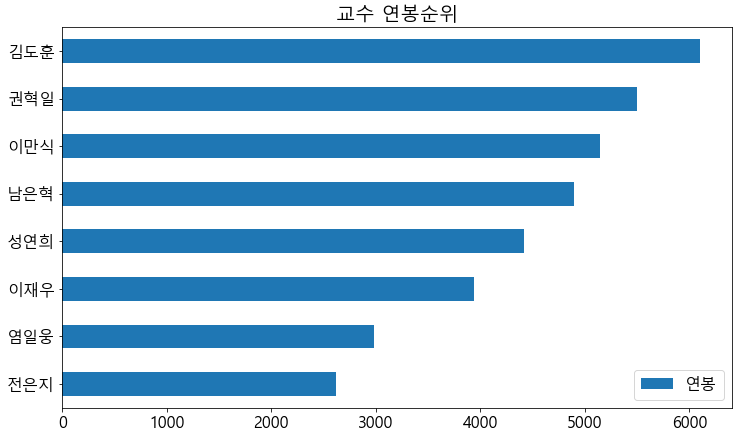

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))

df2.plot.barh(rot = 0, width = 0.5, ax=ax)

ax.set_title('교수 연봉순위')
ax.set_ylabel(None)


plt.show()
plt.close()

# 문제 2-3

In [69]:
sql = "SELECT height, weight FROM student"
cursor.execute(sql)
hwei = cursor.fetchall()
df = DataFrame(hwei, columns = ['키', '몸무게'])
df

,키,몸무게
0,176,72
1,168,52
2,170,88
3,161,42
4,171,54
5,186,72
6,175,92
7,162,72
8,164,48
9,177,92


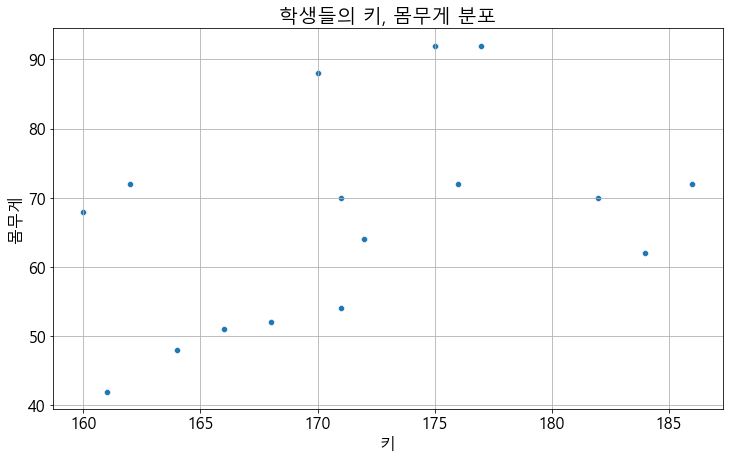

In [73]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))

sns.scatterplot(data = df, x = df['키'], y = df['몸무게'], ax=ax)
ax.grid()
ax.set_title('학생들의 키, 몸무게 분포')

plt.show()
plt.close()

# 문제 2-4

In [81]:
sql1 = "SELECT deptno, count(*) from student GROUP BY deptno"
sql2 = """SELECT d.deptno, count(p.profno) From department d, professor p
where d.deptno = p.deptno group by deptno"""
cursor.execute(sql1)
stu = cursor.fetchall()
dfs = DataFrame(stu, columns = ['학과', '인원수'])
dfs.set_index('학과', inplace=True)
dfs

,인원수
학과,
101,8
102,4
201,4


In [82]:
cursor.execute(sql2)
pro = cursor.fetchall()
dfp = DataFrame(pro, columns = ['학과', '인원수'])
dfp.set_index('학과', inplace=True)
dfp

,인원수
학과,
101,4
102,2
201,1
202,1


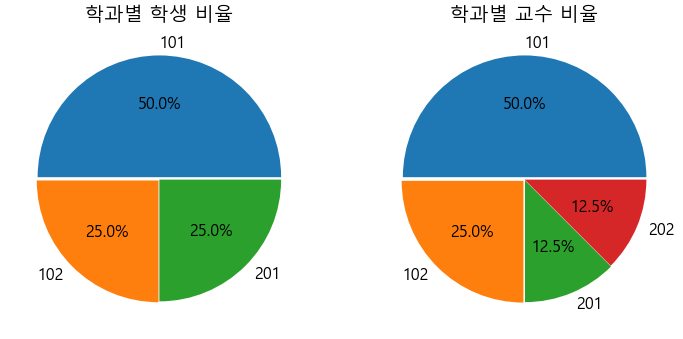

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

dfs['인원수'].plot.pie(explode = [0.02, 0.01, 0.0],
                   autopct = '%0.1f%%',
                   ax = ax[0]
                  )

dfp['인원수'].plot.pie(explode = [0.02, 0.014, 0.007, 0.0],
                   autopct = '%0.1f%%',
                   ax = ax[1]
                  )

ax[0].set_title('학과별 학생 비율')
ax[0].set_ylabel(None)
ax[1].set_title('학과별 교수 비율')
ax[1].set_ylabel(None)

plt.show()
plt.close()